In [1]:
# --- Skrip untuk Analisis Data Eksploratif (EDA) ---

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# --- Konfigurasi ---
# Pastikan file 'train.csv' ada di direktori yang sama dengan skrip ini
TRAIN_DATA_PATH = 'data/credit_card_transaction_train.csv'

print("Memulai Analisis Data Eksploratif (EDA)...")

Memulai Analisis Data Eksploratif (EDA)...


In [3]:
# --- 1. Memuat dan Memeriksa Data ---
try:
    # Menggunakan index_col=0 karena sepertinya ada kolom indeks tanpa nama di data Anda
    df = pd.read_csv(TRAIN_DATA_PATH, index_col=0) 
    print(f"Berhasil memuat {len(df)} baris data dari '{TRAIN_DATA_PATH}'.")
except FileNotFoundError:
    print(f"ERROR: File '{TRAIN_DATA_PATH}' tidak ditemukan. Mohon periksa kembali lokasi file Anda.")
    exit()

Berhasil memuat 1296675 baris data dari 'data/credit_card_transaction_train.csv'.


In [4]:
# Konversi kolom tanggal
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])

print("\n--- Informasi Dasar Dataset ---")
df.info()

print("\n--- Statistik Deskriptif untuk Kolom Numerik ---")
print(df[['amt']].describe().round(2))


--- Informasi Dasar Dataset ---
<class 'pandas.core.frame.DataFrame'>
Index: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   first                  1296675 non-null  object        
 6   last                   1296675 non-null  object        
 7   gender                 1296675 non-null  object        
 8   street                 1296675 non-null  object        
 9   city                   1296675 non-null  object        
 10  state                  1296675 non-null  object        
 11  zip                    1296675 non-null  int64         
 12  


--- Distribusi Kelas Penipuan ---
is_fraud
0    99.421135
1     0.578865
Name: proportion, dtype: float64


/var/folders/06/s2d9zyf13d1_qwrjxhbq8vmh0000gn/T/ipykernel_12383/2508075385.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_fraud', data=df, palette=['#3b82f6', '#ef4444'])


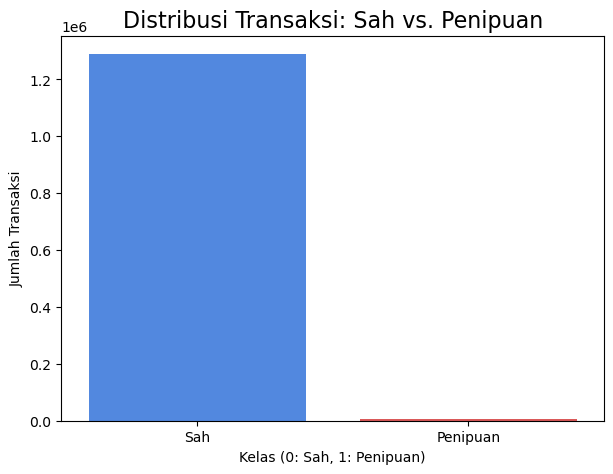

In [5]:

# --- 2. Analisis Variabel Target ('is_fraud') ---
print("\n--- Distribusi Kelas Penipuan ---")
fraud_distribution = df['is_fraud'].value_counts(normalize=True) * 100
print(fraud_distribution)

plt.figure(figsize=(7, 5))
sns.countplot(x='is_fraud', data=df, palette=['#3b82f6', '#ef4444'])
plt.title('Distribusi Transaksi: Sah vs. Penipuan', fontsize=16)
plt.ylabel('Jumlah Transaksi')
plt.xlabel('Kelas (0: Sah, 1: Penipuan)')
plt.xticks([0, 1], ['Sah', 'Penipuan'])
plt.show()